# Time Series Analysis with Stock Price Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [13]:
# reading the dataset using read_csv
df = pd.read_csv("stockpricedata.csv", 
				parse_dates=True, 
				index_col="Date")

# displaying the first five rows of dataset
df.head()


C:\Users\Moulya R\AppData\Local\Temp\ipykernel_20292\1452954590.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("stockpricedata.csv",


,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,2.562803e+10
2016-12-29,43000,43220,42540,42660,448400,1.918823e+10
2016-12-28,43940,43970,43270,43270,339900,1.478067e+10
2016-12-27,43140,43700,43140,43620,400100,1.742799e+10
2016-12-26,43310,43660,43090,43340,358200,1.554780e+10


C:\Users\Moulya R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moulya R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


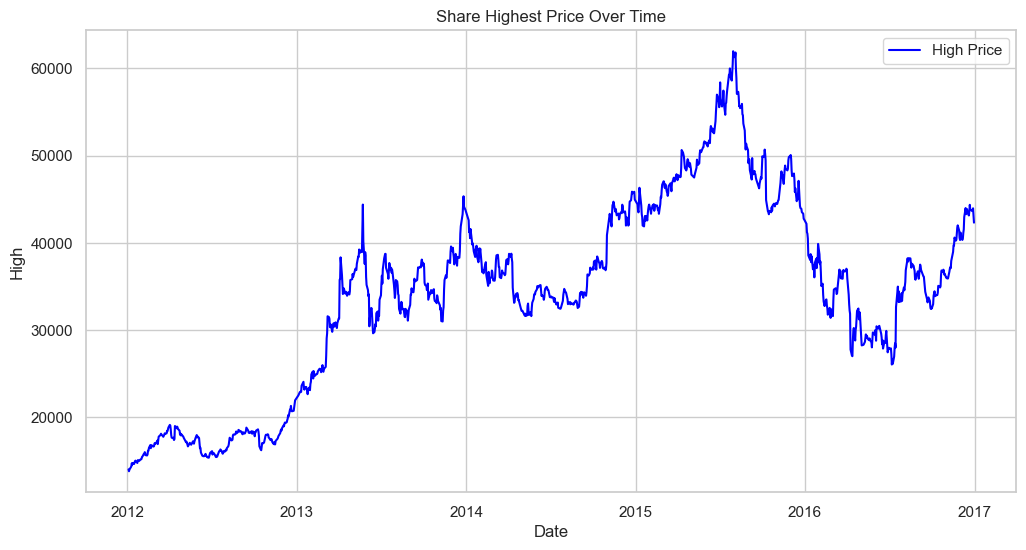

In [14]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()


C:\Users\Moulya R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moulya R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


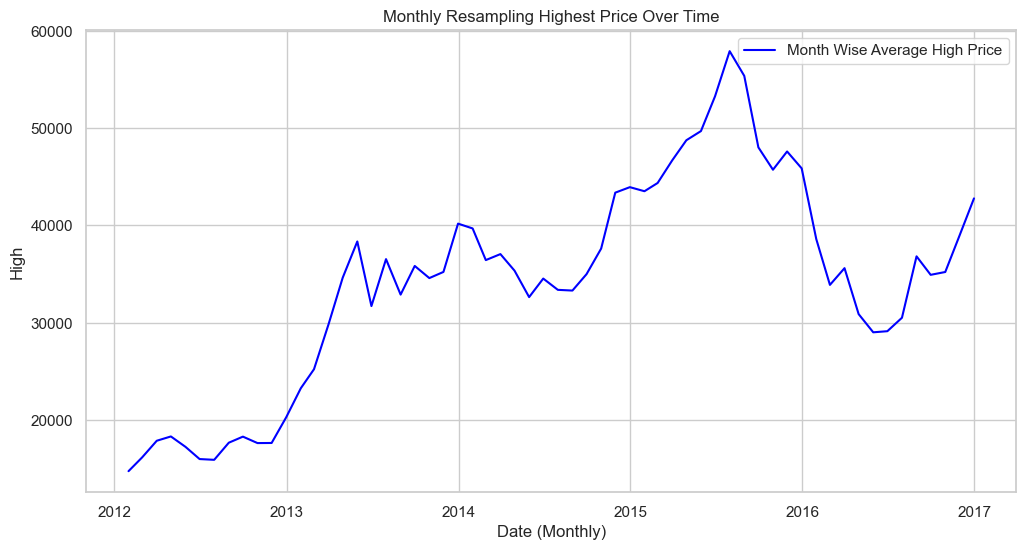

In [15]:
# Assuming df is your DataFrame with a datetime index
df_resampled = df.resample('M').mean() # Resampling to monthly frequency, using mean as an aggregation function

sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()


In [9]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')


The 'Date' column is not present in the DataFrame


<Figure size 1200x600 with 0 Axes>

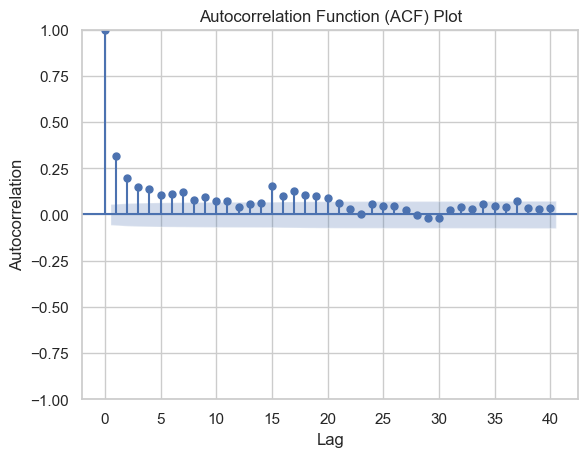

In [27]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    display(df.head())
else:
    print("The 'Date' column is not present in the DataFrame")

 
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.8128900298159419
p-value: 0.8153063648388321
Critical Values: {'1%': -3.4357038129673962, '5%': -2.8639042041471887, '10%': -2.5680287376916997}


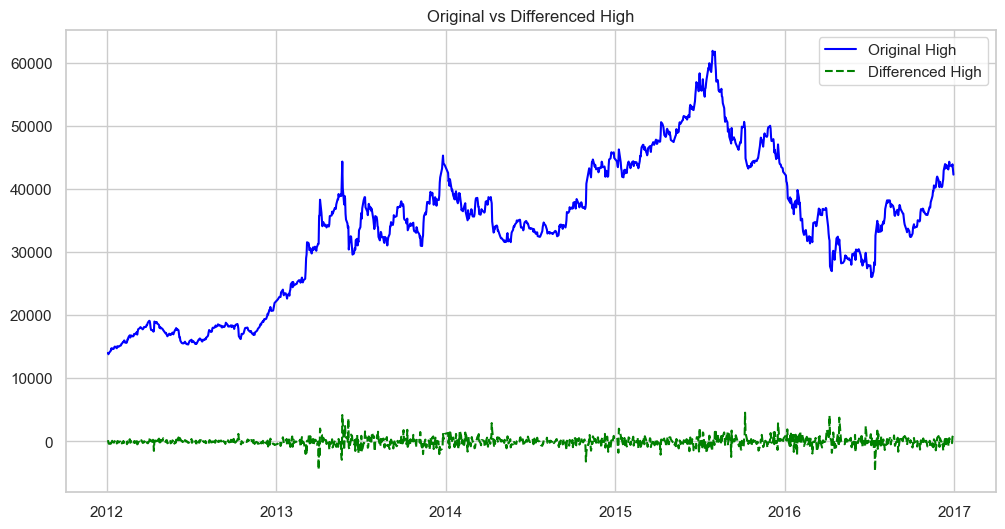

In [21]:
# Differencing
df['high_diff'] = df['High'].diff()
 
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

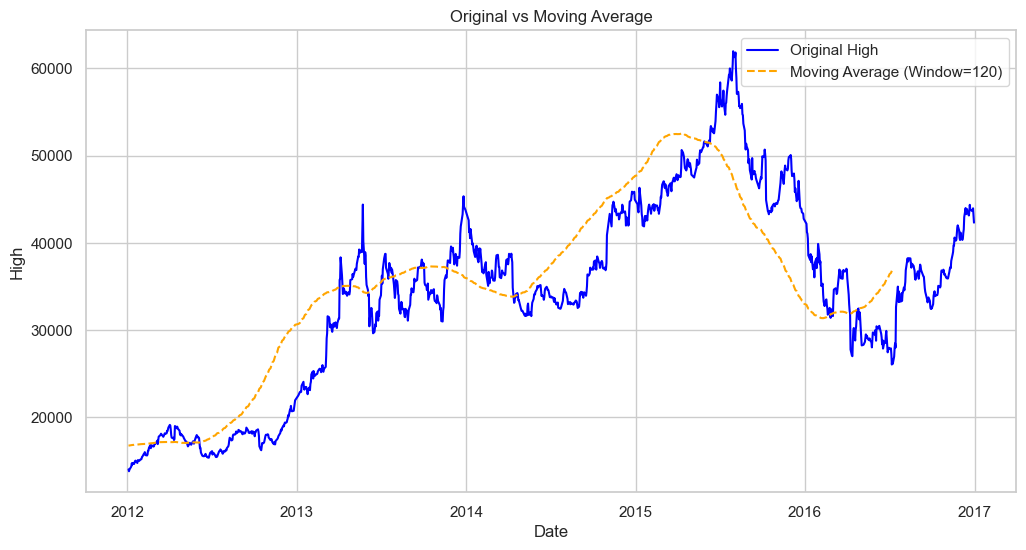

In [22]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()
 
# Plotting
plt.figure(figsize=(12, 6))
 
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')
 
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [23]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)
 
# Display the combined DataFrame
print(df_combined.head())

             High  high_diff
Date                        
2016-12-30  42330        NaN
2016-12-29  43220      890.0
2016-12-28  43970      750.0
2016-12-27  43700     -270.0
2016-12-26  43660      -40.0


In [24]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

Date
2016-12-29    890.0
2016-12-28    750.0
2016-12-27   -270.0
2016-12-26    -40.0
2016-12-22    180.0
Name: high_diff, dtype: float64

In [25]:
from statsmodels.tsa.stattools import adfuller
 
# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -31.41296101177739
p-value: 0.0
Critical Values: {'1%': -3.4357038129673962, '5%': -2.8639042041471887, '10%': -2.5680287376916997}
